In [3]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt ;
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# Import Data Set:

In [5]:
train_data = pd.read_csv('train.csv');
test_data = pd.read_csv('test.csv')

train_data.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


# Exploratory Data Analysis & Data Pre-Processing

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [8]:
train_data.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [9]:
train_data.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [10]:
train_data.duplicated().sum()

0

In [11]:
# Handle Missing Values:
# Impute Numerical Values:

numerical_cols = train_data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy = 'median')
train_data[numerical_cols] = imputer.fit_transform(train_data[numerical_cols])

# Impute Categrical Values:

categorical_cols = train_data.select_dtypes(exclude = [np.number]).columns
for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace = True)


In [12]:
train_data.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [13]:
# Compute corelation for numerical columns:

numerical_cols = train_data.select_dtypes(include = ['float64', 'int64']).columns

numerical_corr = train_data[numerical_cols].corr(method = 'pearson')
numerical_corr

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
id,1.000000,-0.000134,-0.000864,0.000717,0.001340,-0.000135,-0.001461,0.000909,-0.000350,-0.000292
Age,-0.000134,1.000000,0.000061,0.001399,0.000813,0.001544,-0.002436,0.002661,-0.000062,-0.002410
Annual Income,-0.000864,0.000061,1.000000,0.001920,0.023301,0.034777,-0.000438,-0.181180,0.000383,-0.009989
Number of Dependents,0.000717,0.001399,0.001920,1.000000,0.004831,-0.003277,0.001170,-0.001525,-0.000252,-0.000947
Health Score,0.001340,0.000813,0.023301,0.004831,1.000000,0.001779,0.000237,0.009947,0.002374,0.013976
Previous Claims,-0.000135,0.001544,0.034777,-0.003277,0.001779,1.000000,-0.000982,0.028795,0.002502,0.039394
Vehicle Age,-0.001461,-0.002436,-0.000438,0.001170,0.000237,-0.000982,1.000000,0.000470,0.003132,0.000391
Credit Score,0.000909,0.002661,-0.181180,-0.001525,0.009947,0.028795,0.000470,1.000000,0.000446,-0.024471
Insurance Duration,-0.000350,-0.000062,0.000383,-0.000252,0.002374,0.002502,0.003132,0.000446,1.000000,-0.000028
Premium Amount,-0.000292,-0.002410,-0.009989,-0.000947,0.013976,0.039394,0.000391,-0.024471,-0.000028,1.000000


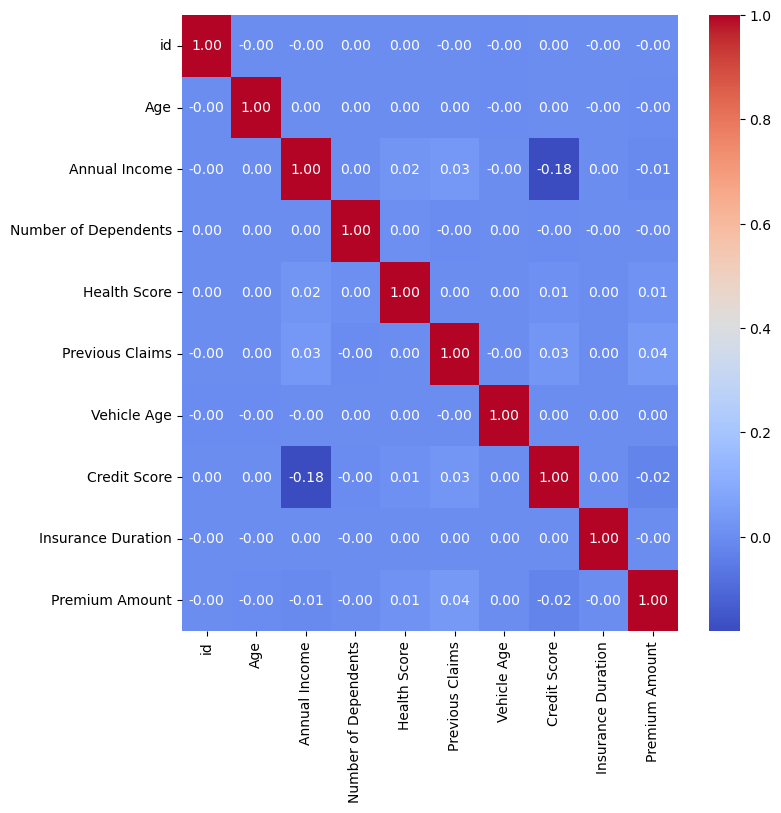

In [14]:
plt.figure(figsize = (8,8))
sns.heatmap(numerical_corr, annot = True, cmap = 'coolwarm', cbar = True, fmt = '.2f')
plt.show()

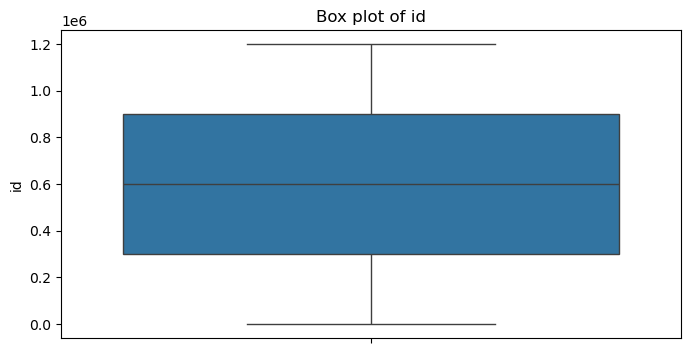

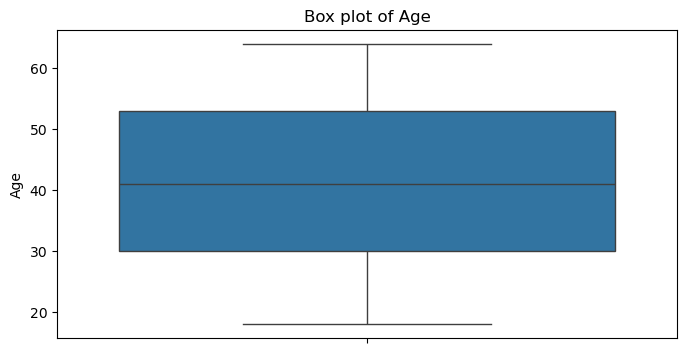

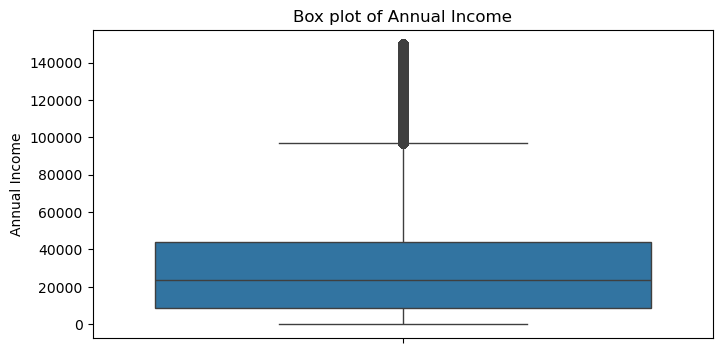

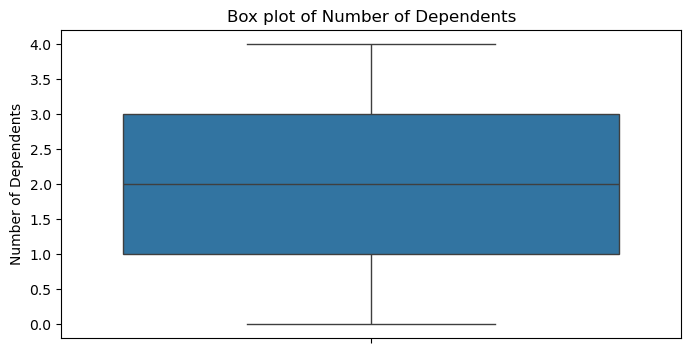

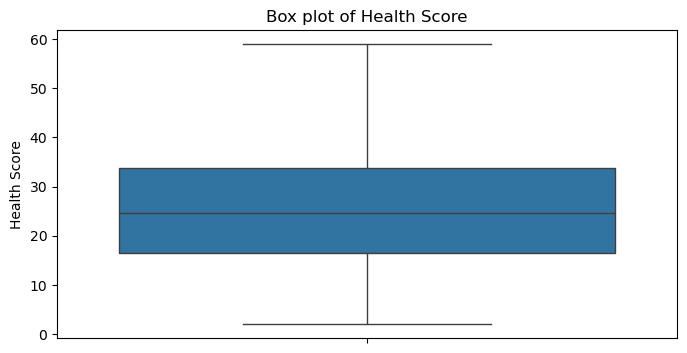

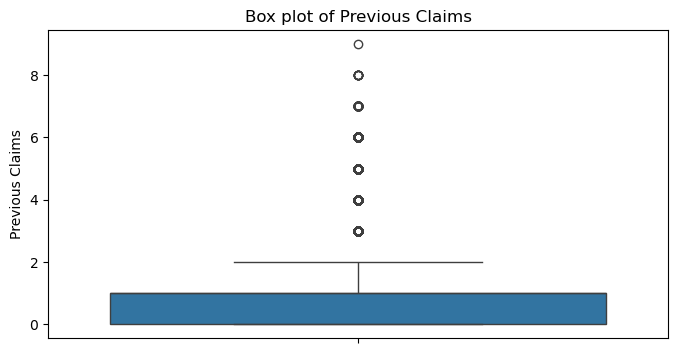

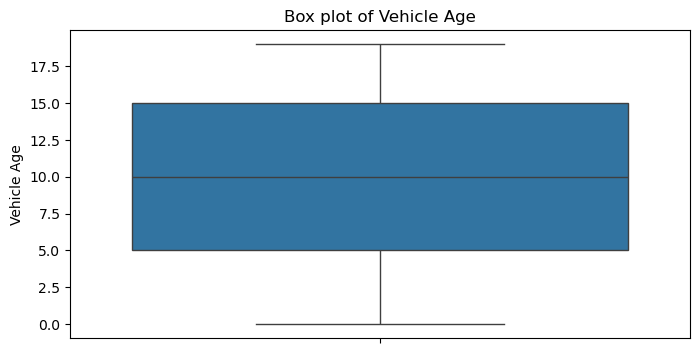

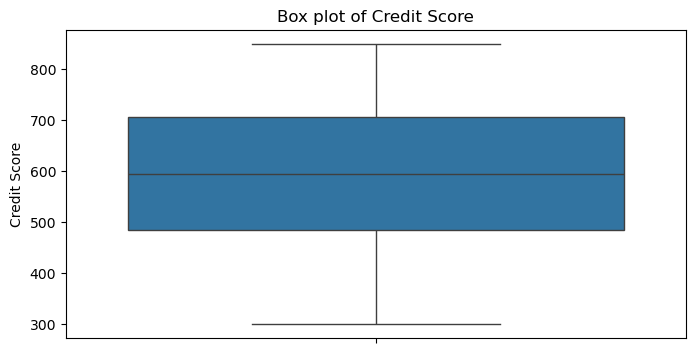

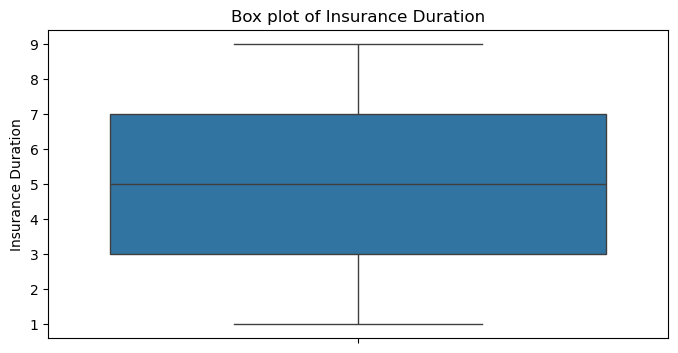

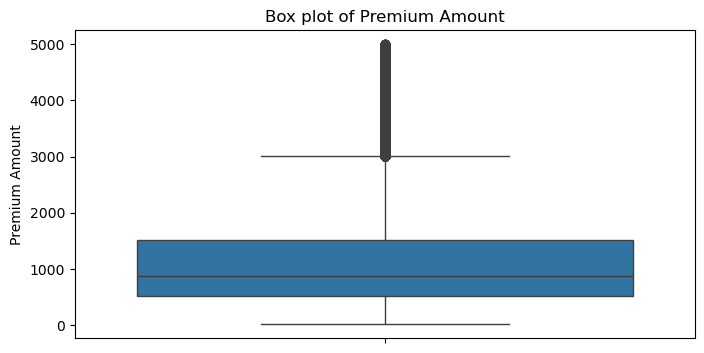

In [15]:
# Checking outliers:

numerical_cols = train_data.select_dtypes(include = ['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize = (8,4))
    sns.boxplot(train_data[col])
    plt.title(f'Box plot of {col}')
    plt.show()
    

In [16]:
# Columns like Annual Income,Previous Claims,and premium amount has outliers

# IQR Method:

Q1 = train_data[numerical_cols].quantile(0.25)
Q3 = train_data[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers_iqr = (train_data[numerical_cols] < lower_bound) | (train_data[numerical_cols] > upper_bound)
outliers_iqr.sum()

id                          0
Age                         0
Annual Income           70466
Number of Dependents        0
Health Score                0
Previous Claims         62066
Vehicle Age                 0
Credit Score                0
Insurance Duration          0
Premium Amount          49320
dtype: int64

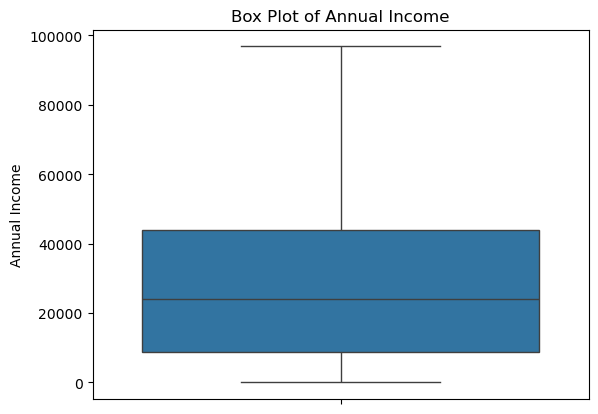

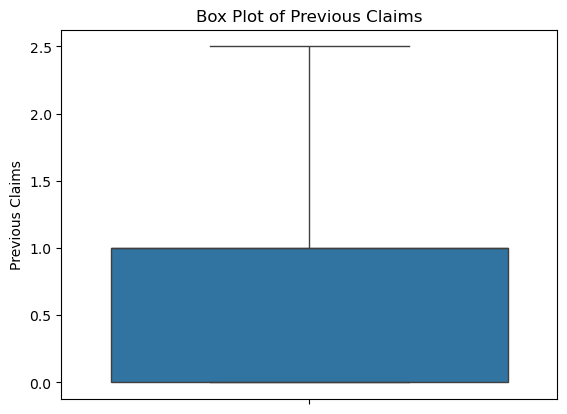

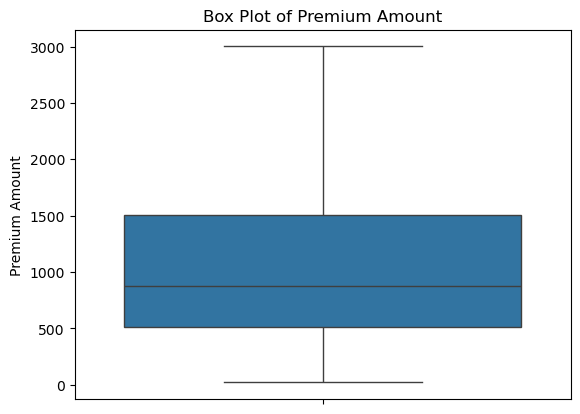

In [17]:
# Capping Method to keep the outliers:

def cap_outliers(df,column):
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[column] = df[column].apply(lambda x:upper_bound if x>upper_bound else (lower_bound if x<lower_bound else x))
    return df[column]

columns_with_outliers = ['Annual Income','Previous Claims','Premium Amount']

for col in columns_with_outliers:
    train_data[col] = cap_outliers(train_data,col)

for col in columns_with_outliers:
    sns.boxplot(data = train_data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [18]:
print(train_data.columns)

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')


In [19]:
train_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0.0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1.0,39.0,Female,31678.0,Divorced,3.0,Master's,Employed,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2.0,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,595.0,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3.0,21.0,Male,96871.0,Married,2.0,Bachelor's,Employed,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4.0,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [20]:
train_data['Exercise Frequency'].unique()

array(['Weekly', 'Monthly', 'Daily', 'Rarely'], dtype=object)

In [21]:
train_data['Education Level'] = train_data['Education Level'].map({"Bachelor's":0,"Master's":1,'High School':2,'PhD':3})

corr = train_data['Education Level'].corr(train_data['Premium Amount'])
print(corr)


-0.0003677280926120776


In [22]:
train_data['Exercise Frequency'] = train_data['Exercise Frequency'].map({'Weekly':0,'Monthly':1,'Daily':2,'Rarely':3})

corr = train_data['Exercise Frequency'].corr(train_data['Premium Amount'])
print(corr)


0.0007054353127559216


In [23]:
# Drop columns like Location, Policy Start Date, Customer Feedback,Property Type , Education Level, Exercise Frequency from both train and test data sets.

columns_to_drop = ['Location','Policy Start Date','Customer Feedback','Property Type', 'Education Level','Exercise Frequency']

train_data.drop(columns = columns_to_drop , inplace = True);
test_data.drop(columns = columns_to_drop, inplace = True);

In [24]:
# Encoding for categorical columns:

# One-Hot Encoding for Gender, Marital Status, Occupation, Smoking Status for both train and test data sets.

train_data = pd.get_dummies(train_data, columns = ['Gender','Marital Status','Occupation','Smoking Status','Policy Type'], drop_first = True)
test_data = pd.get_dummies(test_data, columns = ['Gender','Marital Status','Occupation','Smoking Status', 'Policy Type'], drop_first = True)

# Align test_data columns with train_data

test_data = test_data.reindex(columns = train_data.columns, fill_value = 0)


In [25]:
assert train_data.columns.equals(test_data.columns), "Train and Test columns do not match!"


# Building the Model:

In [27]:
numerical_cols = train_data.select_dtypes(include = ['float64', 'int64']).columns
numerical_cols

Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

In [28]:
# Define feature X and target variable y

X = train_data.drop(columns = ['id','Premium Amount'])
y = train_data['Premium Amount']

In [29]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [30]:
# Scale numerical features:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled.shape

(960000, 16)

In [32]:
y_train.shape

(960000,)

In [33]:
print(train_data.corr()['Premium Amount'].sort_values(ascending=False))


Premium Amount               1.000000
Previous Claims              0.038985
Health Score                 0.014912
Marital Status_Single        0.003770
Occupation_Self-Employed     0.002346
Occupation_Unemployed        0.001577
Vehicle Age                  0.000715
Gender_Male                  0.000180
Policy Type_Comprehensive    0.000061
Smoking Status_Yes           0.000060
id                          -0.000059
Insurance Duration          -0.000310
Policy Type_Premium         -0.000958
Number of Dependents        -0.001056
Marital Status_Married      -0.002154
Age                         -0.002466
Annual Income               -0.021548
Credit Score                -0.026617
Name: Premium Amount, dtype: float64


In [34]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [35]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
import numpy as np

# Initialize the LightGBM Regressor
lgb_model = LGBMRegressor(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    random_state=42,
    verbose = -1
)

# Train the model
lgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test_scaled)

# Evaluate Performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, np.maximum(0, y_pred)))  # Ensure non-negative predictions for log error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Log Error (RMSLE): {rmsle}")


Mean Squared Error (MSE): 609950.3533533567
Root Mean Squared Error (RMSE): 780.993183935274
R-squared (R²): 0.04459844999818208
Root Mean Squared Log Error (RMSLE): 1.13304182034208


Text(0.5, 1.0, 'Predicted vs Actual')

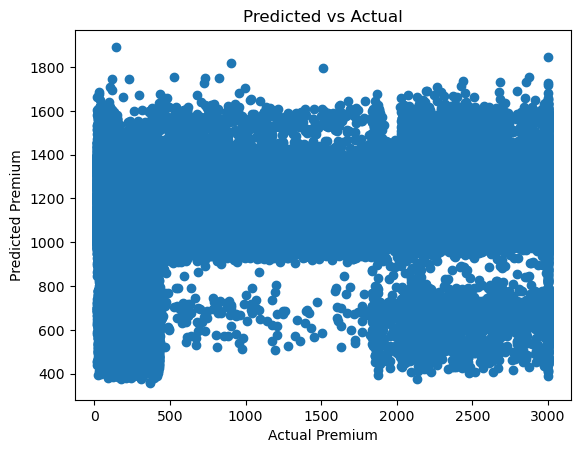

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Premium")
plt.ylabel("Predicted Premium")
plt.title("Predicted vs Actual")


In [37]:
# Hyper parameter tuning:

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import uniform
import lightgbm as lgb

# Split data into training and validation
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Model and RandomizedSearchCV
model = lgb.LGBMRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1)

fit_params = {
    'eval_set': [(X_valid, y_valid)],
    'eval_metric': 'rmsle'
}

# Fit with early stopping
random_search.fit(
    X_train_sub,
    y_train_sub,
    **fit_params
)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05998227236961444, 'max_depth': 7, 'n_estimators': 100, 'num_leaves': 50, 'subsample': 1.0}
Best Score: 0.04398634548432027


In [38]:
# Retrain the model using the best parameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmsle = np.sqrt(mean_squared_log_error(y_test, np.maximum(0, y_pred)))  # Ensure non-negative predictions for log error

r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)
print(f"Root Mean Squared Error (RMSE): {rmse}")

print(f"Root Mean Squared Log Error (RMSLE): {rmsle}")


MSE: 610626.7807901292
R-squared: 0.04353892143490923
Root Mean Squared Error (RMSE): 781.4261198540328
Root Mean Squared Log Error (RMSLE): 1.1345499904816938


# Submission:

In [ ]:
X_test = test_data.drop(columns=['id','Premium Amount'])  # Drop non-feature columns
X_test_scaled = scaler.transform(X_test)  #
# Make predictions on the test set
y_pred_test = best_model.predict(X_test_scaled)

# Create the submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'], 
    'Premium Amount': y_pred_test  # Predictions made by model
})

# Save the DataFrame to a CSV file
submission.to_csv('final_submission.csv', index=False)